### Statistical methods for machin learning
#### Discover how to Transform Data into Knowledge with Python
 ##### Jason Brownlee

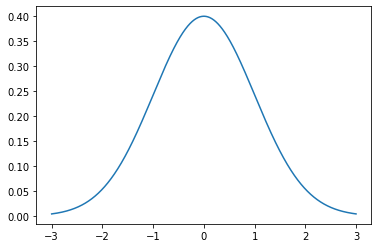

In [1]:
# Gaussian Distribution
# generate and plot an idealized gaussian
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# x-axis for the plot
x_axis = arange(-3, 3, 0.001)
# y-axis as the gaussian
y_axis = norm.pdf(x_axis, 0, 1)
# plot data
pyplot.plot(x_axis, y_axis)
pyplot.show()

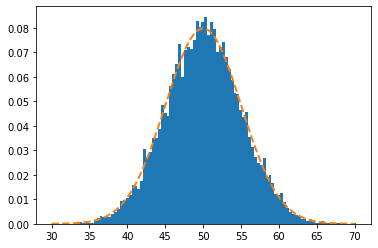

In [21]:
# generate a sample of random gaussians
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from scipy.stats import norm
import numpy as np 

# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# histogram of generated data
pyplot.hist(data, bins=100, density=True)

x = np.arange(30, 70, 0.01)
y = norm.pdf(x, 50, 5)
pyplot.plot(x, y, lw=2, ls="--")
pyplot.show()

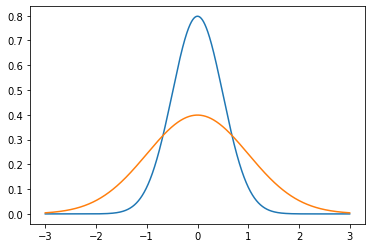

In [22]:
# Variance
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# x-axis for the plot
x_axis = arange(-3, 3, 0.001)
# plot low variance
pyplot.plot(x_axis, norm.pdf(x_axis, 0, 0.5))
# plot high variance
pyplot.plot(x_axis, norm.pdf(x_axis, 0, 1))
pyplot.show()

In [26]:
data = 5.0 * np.random.randn(10000) + 50
print("VAR", np.var(data))
print("VAR", np.var(data, ddof=1))
print("STD", np.std(data))
print("STD", np.std(data, ddof=1))

VAR 25.224404924869642
VAR 25.226927617631404
STD 5.022390359666366
STD 5.022641498019882


#### Central Limit Theorem

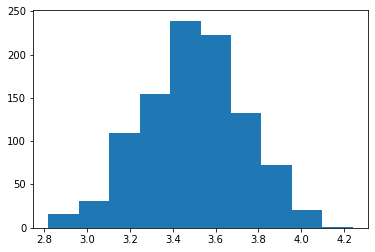

In [39]:
# demonstration of the central limit theorem
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
# seed the random number generator
seed(1)
# calculate the mean of 50 dice rolls 1000 times
means = [mean(randint(1, 7, 50)) for _ in range(1000)]
# plot the distribution of sample means
pyplot.hist(means);  # int(np.sqrt(len(means)))

#### 10.3 Gaussian Distribution

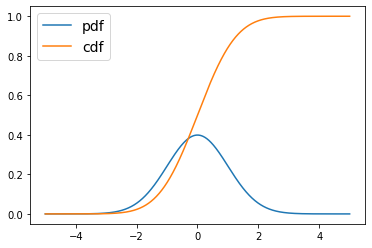

In [42]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
mean = 0.0
stdev = 1.0
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
cdf = norm.cdf(sample_space)
# plot
pyplot.plot(sample_space, pdf, label="pdf")
pyplot.plot(sample_space, cdf, label="cdf")
pyplot.legend(fontsize=14)
pyplot.show()

#### Student's t-Distribution
A statistical quantity that makes use of another statistical quantity in its calculation must subtract 1 from the degrees of freedom.

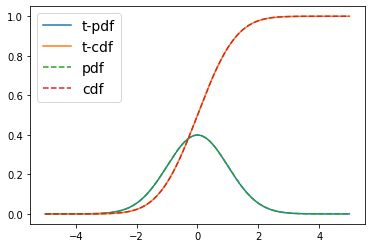

In [71]:
import numpy as np 
import pylab as pl
from scipy import stats
t_sample = np.arange(-5, 5, 0.01)
sample = np.arange(-5, 5, 0.001)

t_dof = len(t_sample) - 1
t_pdf = stats.t.pdf(t_sample, t_dof, loc=0, scale=1)
t_cdf = stats.t.cdf(t_sample, t_dof, loc=0, scale=1)
pdf = stats.norm.pdf(sample, 0, 1)
cdf = stats.norm.cdf(sample, 0, 1)
pl.plot(t_sample, t_pdf, label="t-pdf")
pl.plot(t_sample, t_cdf, label="t-cdf")
pl.plot(sample, pdf, ls="--", label="pdf")
pl.plot(sample, cdf, ls="--", label="cdf")
pl.legend(fontsize=14)
pl.show();

#### Chi-Squared Distribution

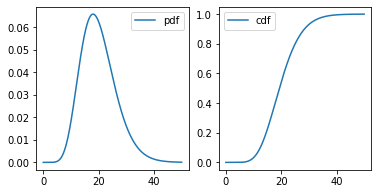

In [66]:
import numpy as np 
import pylab as pl
from scipy import stats

sample = np.arange(0, 50, 0.01)
dof = 20
pdf = stats.chi2.pdf(sample, dof)
cdf = stats.chi2.cdf(sample, dof)

fig, ax = pl.subplots(ncols=2, figsize=(6, 3))
ax[0].plot(sample, pdf, label="pdf")
ax[1].plot(sample, cdf, label="cdf")

ax[0].legend()
ax[1].legend()
pl.show();

### Critical Values
-  Gaussian Critical Values

The example below calculates the percent point function for 95% on the standard Gaussian
distribution.

In [82]:
# gaussian percent point function
from scipy.stats import norm
# define probability
p = 0.95
# retrieve value <= probability
value = norm.ppf(p)
print(value)
# confirm with cdf
p = norm.cdf(value)
print(p)

1.6448536269514722
0.95


-  Student's t Critical Values

In [79]:
# student t-distribution percent point function
from scipy.stats import t
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = t.ppf(p, df)
print(value)
# confirm with cdf
p = t.cdf(value, df)
print(p)

1.8124611228107335
0.949999999999923


-  Chi-Squared Critical Values

In [80]:
# chi-squared percent point function
from scipy.stats import chi2
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = chi2.ppf(p, df)
print(value)
# confirm with cdf
p = chi2.cdf(value, df)
print(p)

18.307038053275146
0.95


The numerical result is 0.950000 (+-1.04687e-11)


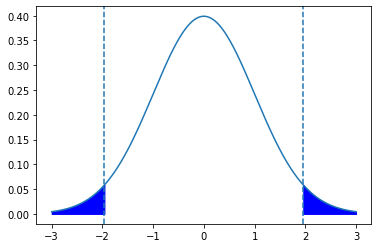

In [102]:
import numpy as np 
import pylab as pl
from scipy.integrate import quad
from scipy.stats import norm

x = np.arange(-3, 3, 0.001)
y = norm.pdf(x, 0, 1)
p = 0.975
value = norm.ppf(p)

res, err = quad(norm.pdf, -value, value)
print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

pl.axvline(x=value, ls="--")
pl.axvline(x=-value, ls="--")
pl.plot(x, y)

x1 = np.arange(-3, -value, 0.001)
x2 = np.arange(value, 3, 0.001)
pl.fill_between(x1, norm.pdf(x1), color="b")
pl.fill_between(x2, norm.pdf(x2), color="b")
pl.show();